In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService



In [9]:
qc = QuantumCircuit(2)

qc.h(0) #hadamard

qc.cx(0,1) #cntrolled X, by 0 fir 1

qc.draw("mpl")

observables_lables = ["IZ","IX", "ZI", "XI", "ZZ","XX"]
observables = [SparsePauliOp(label) for label in observables_lables]

c:\Users\torbj\OneDrive\Documents\NTNU\Fag\11 Master\Quantum_coding\venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


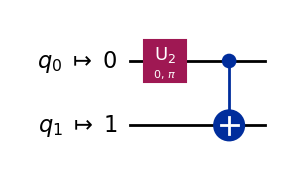

In [10]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()
estimator = Estimator(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level = 1 )

isa_circuit = pm.run(qc)

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

pub_result = result[0]

isa_circuit.draw('mpl', idle_wires=False)



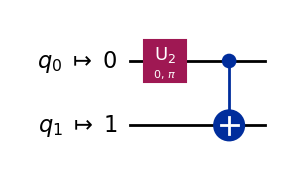

In [8]:
isa_circuit.draw('mpl', idle_wires=False)

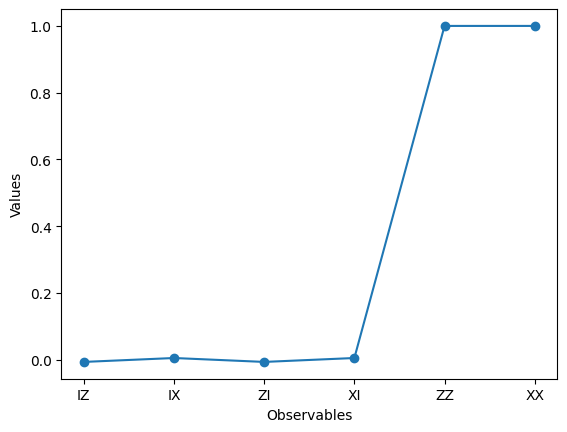

In [13]:
from matplotlib import pyplot as plt
values = pub_result.data.evs
errors = pub_result.data.stds

plt.plot(observables_lables, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

In [52]:
from qiskit import QuantumCircuit

def get_qc_for_n_qubit_GHZ_state(n):
    
    if isinstance(n, int) and n>=2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n-1):
            qc.cx(i, i+1)
    else:
        raise Exception(f'{n} is not a valid input. It is a {type(n)}')
    return qc

n = 20
qc = get_qc_for_n_qubit_GHZ_state(n)

In [53]:
operator_string = ['Z' + 'I'*i +'Z'+'I'*(n-2-i) for i in range(n-1)]

operators = [SparsePauliOp(operator) for operator in operator_string]
print(len(operators))

19


In [54]:
backend = FakeAlmadenV2()
pm= generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circuit = pm.run(qc)
isa_operators_list=[op.apply_layout(isa_circuit.layout) for op in operators]

In [37]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

In [38]:
job = estimator.run([(isa_circuit, isa_operators_list)])


c:\Users\torbj\OneDrive\Documents\NTNU\Fag\11 Master\Quantum_coding\venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:232: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


c:\Users\torbj\OneDrive\Documents\NTNU\Fag\11 Master\Quantum_coding\venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


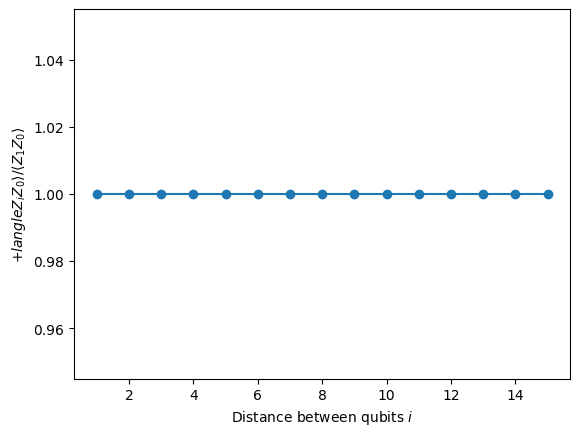

In [39]:
data = list(range(1,len(operators)+1)) #distance between Z operators
result = job.result()[0]
values = result.data.evs #expectation values at each Z operator
valyes = [v/values[0] for v in values] #normalize expecation values to see how they decay w distance


label = str(n) + "-qubit GHZ state"
plt.plot(data,values,marker='o', label= label)
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$+langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $')
plt.legend
plt.show()

In [1]:
import numpy as np
import timeit

A = np.random.rand(1000, 1000)
B = np.random.rand(1000, 1000)

# Time using @ operator
time_at = timeit.timeit('A @ B', globals=globals(), number=100)

# Time using np.matmul()
time_matmul = timeit.timeit('np.matmul(A, B)', globals=globals(), number=100)

# Time using np.dot()
time_dot = timeit.timeit('np.dot(A, B)', globals=globals(), number=100)

print(f"@ operator: {time_at:.5f}s")
print(f"np.matmul: {time_matmul:.5f}s")
print(f"np.dot: {time_dot:.5f}s")

@ operator: 4.37526s
np.matmul: 3.92382s
np.dot: 4.16162s
